<a href="https://colab.research.google.com/github/ThePyProgrammer/GaitMonitoringForParkinsonsDiseasePatients/blob/main/SMP%20(v1.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gait Monitoring for Parkinson's Disease Patients**
**Mentor**: Arthur Tay

##**Project Description**
The objective of this project is to monitor the gait patterns for people with Parkinson Disease. We will analyse the gait for PD patients during freezing and non-freezing (normal) events. Various parameters (e.g. cadence, step lengths, stride lengths, etc) related to gait will be derived from motion sensors (accelerometers, gyroscopes, magnetometers) using public datasets of PD patients. We will then investigate which of these parameters is most suitable for classification for freezing of gait in PD patients.

##**Final Product**
To make use of signal processing algorithms in extracting gait parameters from motion sensors and identifying most suitable parameters for classification of freezing of gait in PD patients.

##**Methodology** 
Students will first need to review and understands how to extract gait parameters from motion sensors. There are different algorithms in the literature and they will need to investigate which is most suitable. They will then make use of a PD patient public dataset to test out their methods. If time permits, they will learn basic machine learning tools for classification.

##**Dataset**
[link](https://www.physionet.org/content/gaitdb/1.0.0/)

###**Data Description**

Walking stride interval time series included are from 15 subjects: 5 healthy young adults (23 - 29 years old), 5 healthy old adults (71 - 77 years old), and 5 older adults (60 - 77 years old) with Parkinson's disease. The file name indicates old (o), young (y) or Parkinson's disease (pd). For the old and young subjects, the age (in years) is also included in the filename.



Subjects walked continuously on level ground around an obstacle-free path. The stride interval was measured using ultra-thin, force sensitive resistors placed inside the shoe. The analog force signal was sampled at 300 Hz with a 12 bit A/D converter, using an ambulatory, ankle-worn microcomputer that also recorded the data. Subsequently, the time between foot-strikes was automatically computed. The method for determining the stride interval is a modification of a previously validated method that has been shown to agree with force-platform measures, a “gold” standard.



Data were collected from the healthy subjects as they walked in a roughly circular path for 15 minutes, and from the subjects with Parkinson’s disease as they walked for 6 minutes up and down a long hallway.

In [3]:
import numpy as np # main library for numeric calculations
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data plotting
import seaborn as sns
sns.set() # mainly to set style of the plot

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, median_absolute_error, mean_squared_error, mean_squared_log_error #technically not used

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from glob import glob
import re

from tqdm import tqdm_notebook

from itertools import product
from datetime import datetime, date, timedelta
from fbprophet import Prophet

"""
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

import warnings
warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter

%matplotlib inline
# to place plotting inside the diagram

data = []
names = []
for i in sorted(glob("*.txt")):
  names.append(i)
  data.append(pd.read_csv(i, sep="\t", names=["time", "stride_time"]).set_index("time"))

data[0]

,stride_time
time,
30.797,1.023
31.820,1.030
32.850,1.017
33.867,1.027
34.893,1.043
...,...
865.780,0.997
866.777,0.993
867.770,1.007


o1.txt
o2.txt
o3.txt
o4.txt
o5.txt
pd1.txt
pd2.txt
pd3.txt
pd4.txt
pd5.txt
y1.txt
y2.txt
y3.txt
y4.txt
y5.txt


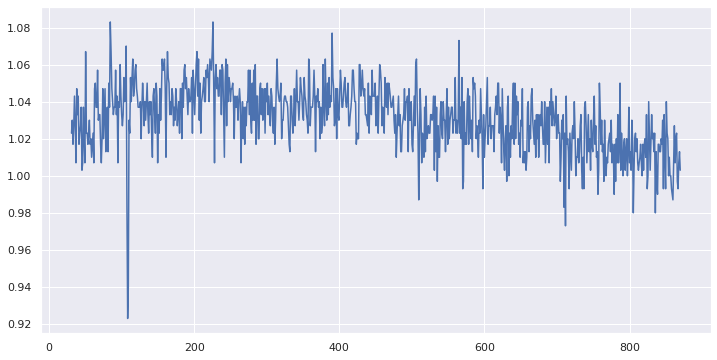

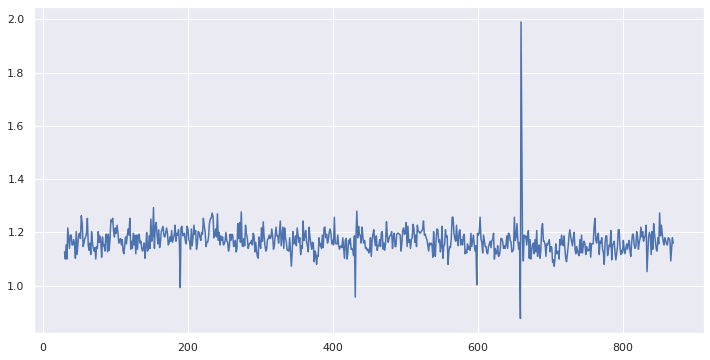

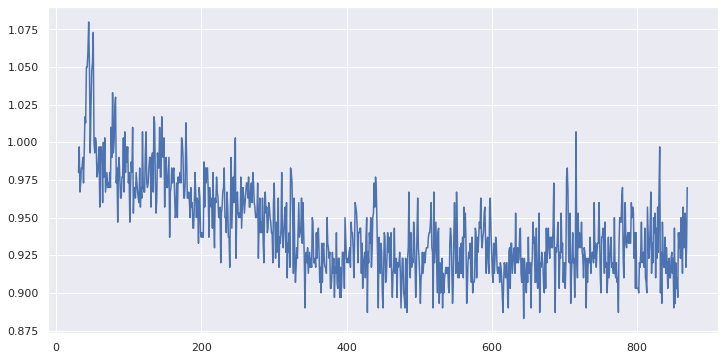

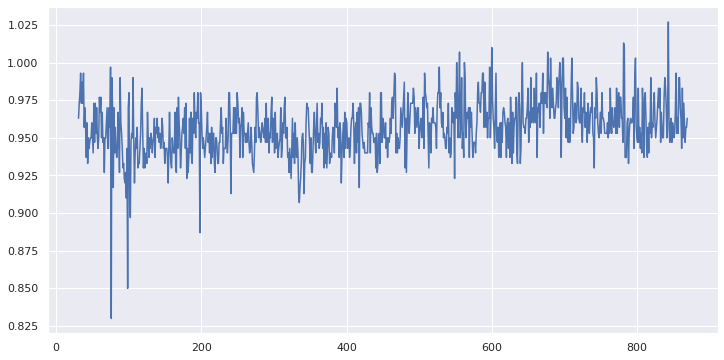

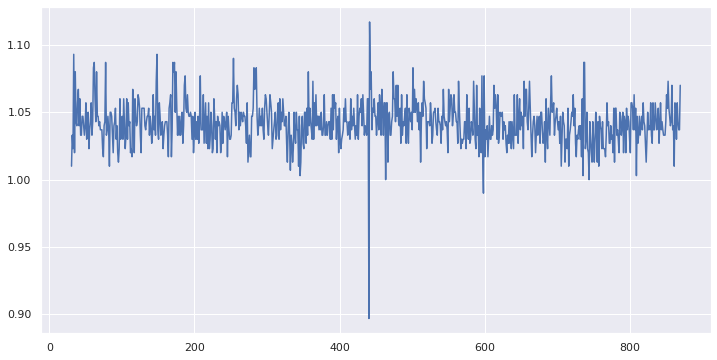

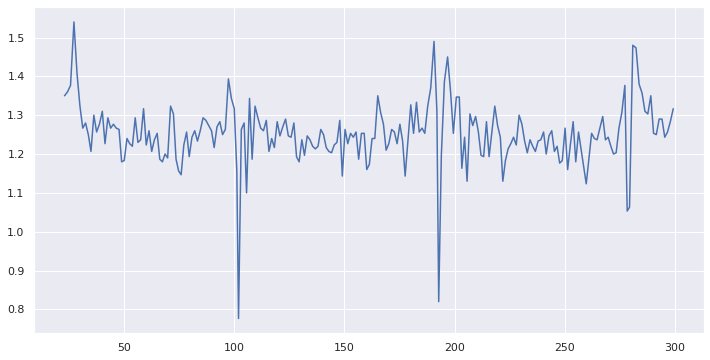

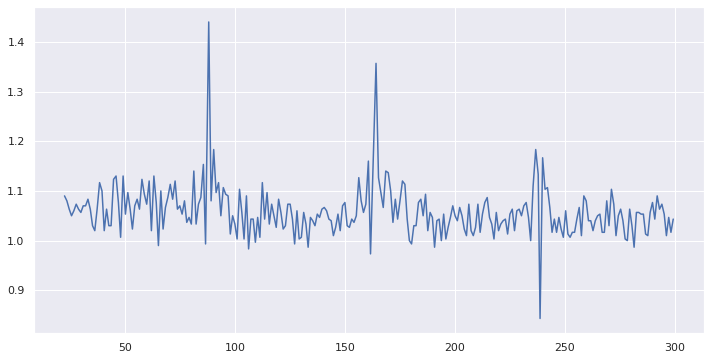

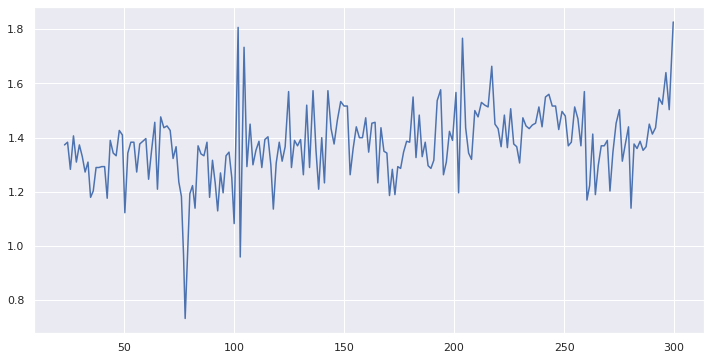

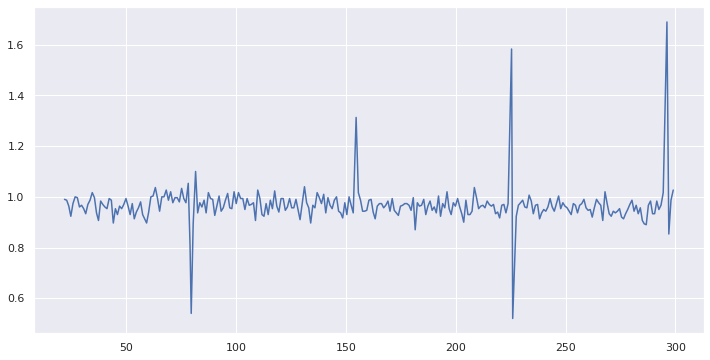

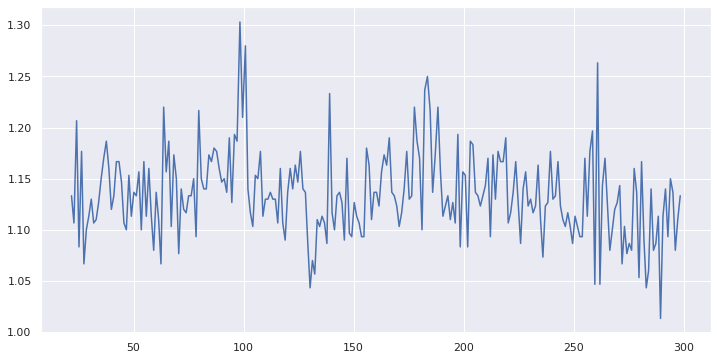

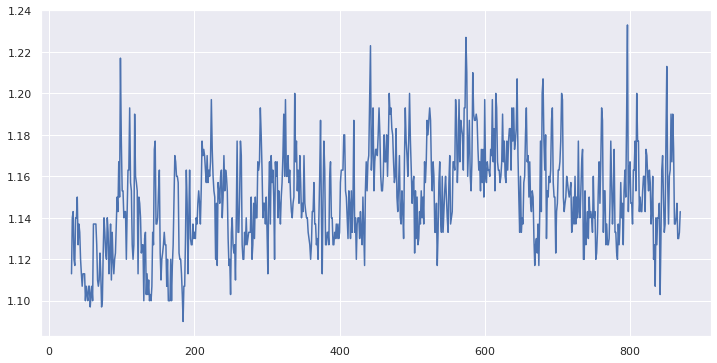

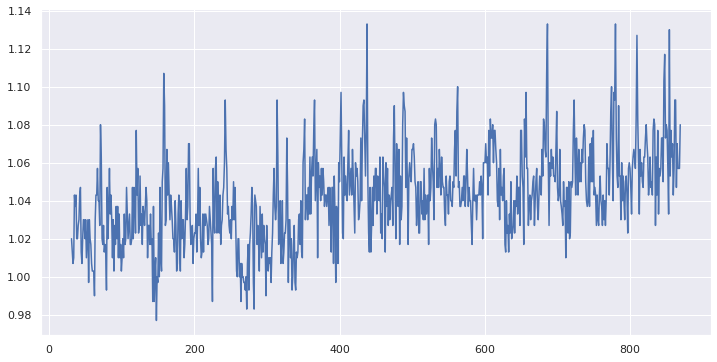

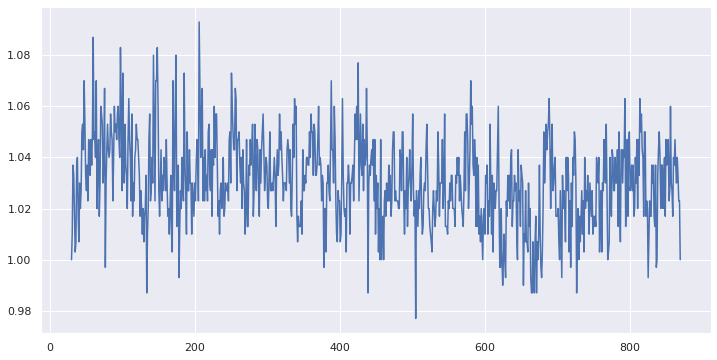

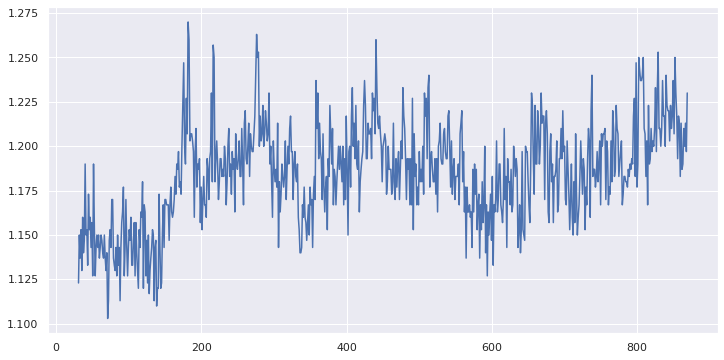

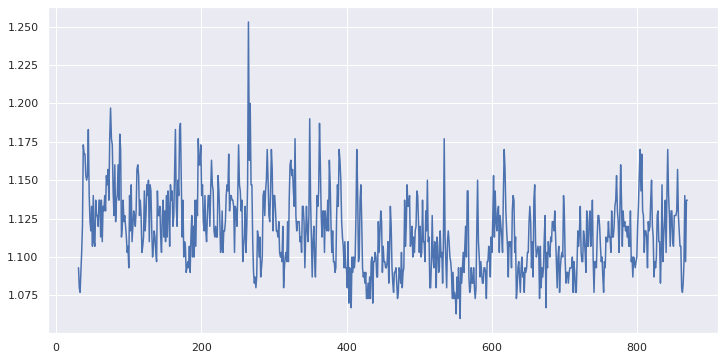

In [6]:
for i in range(len(data)):
  plt.figure(figsize=(12, 6))
  print(names[i])
  plt.plot(data[i].index, data[i]["stride_time"])

In [ ]:
""